<a href="https://colab.research.google.com/github/sabbaninikhitha/Hepatitis-C-Prediction/blob/main/Hepatitis_C_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/HepatitisCdata.csv')

In [ ]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
print(df.isnull().sum())

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [ ]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df = df.drop('Unnamed: 0', axis=1)

print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [ ]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})

In [ ]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
# Value counts of categorical variables
print(df['Category'].value_counts())
print(df['Sex'].value_counts())

0    540
1     75
Name: Category, dtype: int64
0    377
1    238
Name: Sex, dtype: int64


In [ ]:
col=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']

Total Suspected Patients : 540 
Total Healthy Patients : 75 


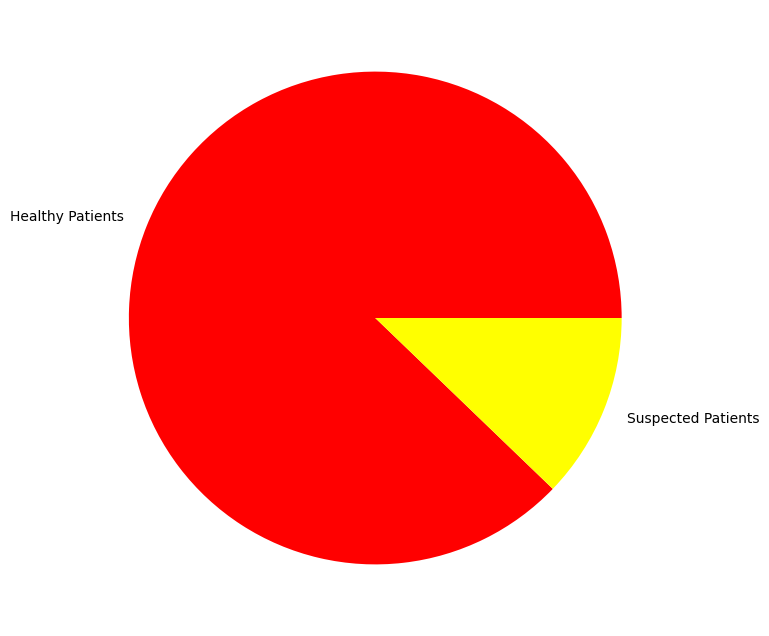

In [ ]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(),
        colors=["red","yellow"],
        labels=["Healthy Patients","Suspected Patients"],
        )

plt.show()

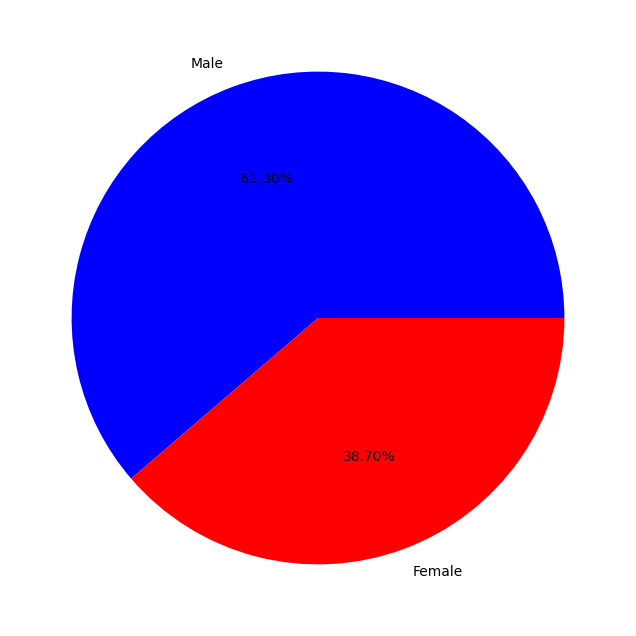

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(),
        colors=["blue","red"],
        labels=["Male","Female"],
        autopct="%1.2f%%",
        )
plt.show()

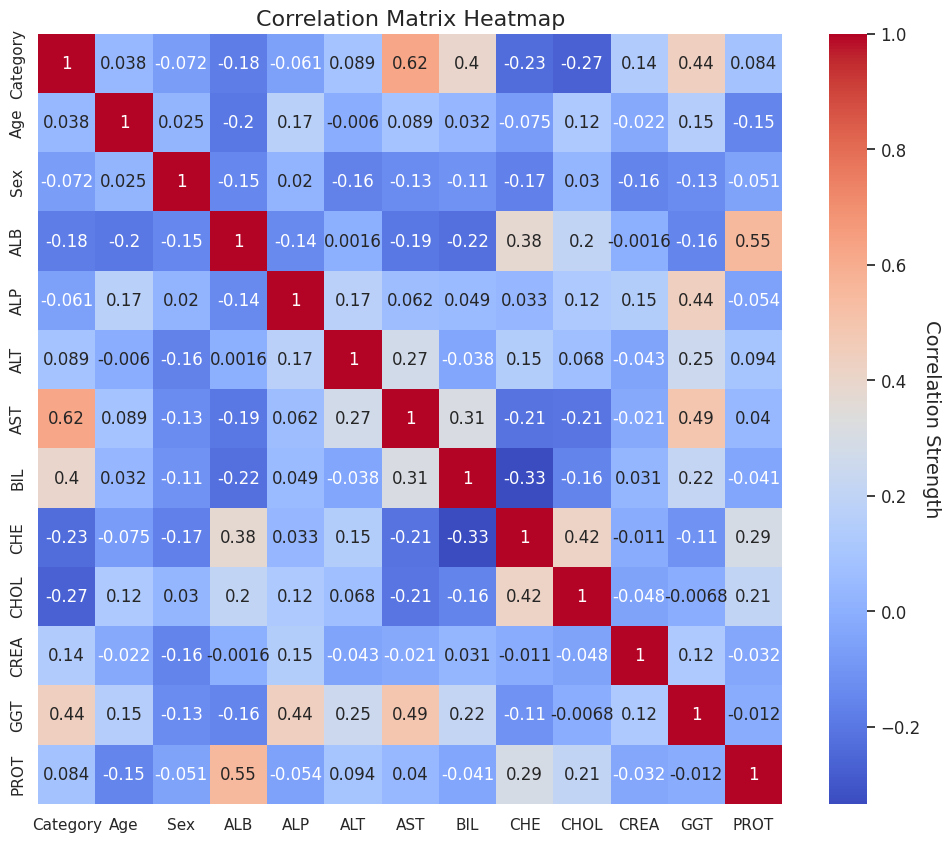

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
plt.title("Correlation Matrix Heatmap", fontsize=16)
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', ax=ax)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Correlation Strength', rotation=270, fontsize=14, labelpad=15)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Category", axis=1)
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
610    1
611    1
612    1
613    1
614    1
Name: Category, Length: 615, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
logistic_regression = LogisticRegression()
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
knn = KNeighborsClassifier()
gaussian_nb = GaussianNB()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()


In [ ]:
logistic_regression.fit(X_train, y_train)
logistic_regression = LogisticRegression(max_iter=1000)
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
knn.fit(X_train, y_train)
gaussian_nb.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [ ]:
models = {
    'Logistic Regression': logistic_regression,
    'SVM (Linear)': svm_linear,
    'SVM (RBF)': svm_rbf,
    'K-Nearest Neighbors': knn,
    'Gaussian Naive Bayes': gaussian_nb,
    'Random Forest': random_forest,
    'Decision Tree': decision_tree
}



In [34]:
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print()


Logistic Regression Accuracy: 0.8943089430894309
Confusion Matrix for Logistic Regression:
[[97  2]
 [11 13]]

SVM (Linear) Accuracy: 0.8943089430894309
Confusion Matrix for SVM (Linear):
[[97  2]
 [11 13]]

SVM (RBF) Accuracy: 0.8780487804878049
Confusion Matrix for SVM (RBF):
[[97  2]
 [13 11]]

K-Nearest Neighbors Accuracy: 0.8861788617886179
Confusion Matrix for K-Nearest Neighbors:
[[97  2]
 [12 12]]

Gaussian Naive Bayes Accuracy: 0.8780487804878049
Confusion Matrix for Gaussian Naive Bayes:
[[95  4]
 [11 13]]

Random Forest Accuracy: 0.943089430894309
Confusion Matrix for Random Forest:
[[99  0]
 [ 7 17]]

Decision Tree Accuracy: 0.9349593495934959
Confusion Matrix for Decision Tree:
[[97  2]
 [ 6 18]]



In [37]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an empty DataFrame to store the scores
scores_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the scores in the DataFrame
    scores_df.loc[name] = [accuracy, precision, recall, f1]

# Display the DataFrame
print(scores_df)


                      Accuracy  Precision    Recall  F1 Score
Logistic Regression   0.894309   0.866667  0.541667  0.666667
SVM (Linear)          0.894309   0.866667  0.541667  0.666667
SVM (RBF)             0.878049   0.846154  0.458333  0.594595
K-Nearest Neighbors   0.886179   0.857143  0.500000  0.631579
Gaussian Naive Bayes  0.878049   0.764706  0.541667  0.634146
Random Forest         0.943089   1.000000  0.708333  0.829268
Decision Tree         0.918699   0.850000  0.708333  0.772727
